___
# Ciência dos Dados - PROJETO 1

## COLOQUE AQUI SEU NOME

Tainara Soares Mendes

## TÍTULO DO SEU PROJETO

Análise acerca da determinância da desinformação na perpetuação da pobreza no Brasil

___
## Introdução


Ao desenvolver o presente trabalho, objetivo analisar se a desinformação, na medida em que priva as populações carentes de tomarem ciência acerca dos programas sociais mantidos pelo governo para erradicação da pobreza no Brasil, pode ser considerada um fator determinante na perpetuação desta no país. É perceptível, portanto, que escolhi o viés do acesso à Internet e TV para desenvolver o meu projeto. No entanto, quando abordo a questão da perpetuação da pobreza, a qual está diretamente relacionada com a questão da segurança alimentar, subentende-se que o meu projeto flutua entre ambos os temas dados, estando diretamente relacionado ao acesso à Internet e TV e indiretamente relacionado à seguridade alimentar.

Toda a minha pesquisa está embasada na base de dados do ano de 2014 da Pesquisa Nacional por Amostra de Domicílio (PNAD), a qual é intitulada "Microdados das Pesquisas Básica e Suplementares do Acesso à Internet e à Televisão e Cadastro Único para Programa Social do Governo Federal". Como o meu trabalho considera como essenciais variáveis que estão presentes apenas na base de dados do ano anteriormente citado, não pude estender a minha análise às PNAD's dos demais anos.



___
## Análise e Resultados

In [61]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
sns.set(style="whitegrid")

In [62]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\taina\Documents\ciência_dos_dados


In [63]:
data = pd.read_table('DOM2014.csv', encoding="Windows-1252",sep=",")

De modo a restringir a minha pesquisa às regiões mais carentes do país, realizo, em primeiro plano, uma análise sobre a renda per capita domiciliar média em cada estado brasileiro, para uma posterior filtragem dos dados. Observe que, em meu trabalho, considero como mais carente a região ou agrupamento de regiões com a menor renda per capita domiciliar média. É plausível a restrição em questão, visto que o foco na região com a menor renda per capita domiciliar média coincide não somente com o foco na região onde os programas governamentais de transferência de renda deveriam atender a um número maior de famílias, como também onde, supõe-se, o acesso aos meios de comunicação e à informação em geral, seja mais restrito. O foco em uma região em específico, onde a incidência de um certo problema é maior, me permite generalizar as causas para o restante do país.

Para realizar a análise, agrupei as regiões da seguinte maneira:

1. Regiões Norte e Nordeste
2. Regiões Sul e Sudeste
3. Região Centro-Oeste

A seguir, averiguo, graficamente, o intervalo de valor de renda no qual está localizado a grande maioria dos valores das rendas computadas. Posteriormente, filtro os dados de modo a restringir as rendas computadas somente a esse intervalo, para que os valores denominados aberrantes, isto é, as rendas per capita domiciliares de uma minoria mais rica da população, não atrapalhem a média da grande maioria da população, a qual quero calcular. E então, a partir dos dados filtrados, mais coniventes com a realidade da grande maioria da população, calculo a média das rendas per capita domiciliares de cada um dos agrupamentos de regiões. A partir da média, concluo qual é o agrupamento de regiões mais carente do Brasil, segundo os critérios os quais estou utilizando.

C:\Users\taina\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


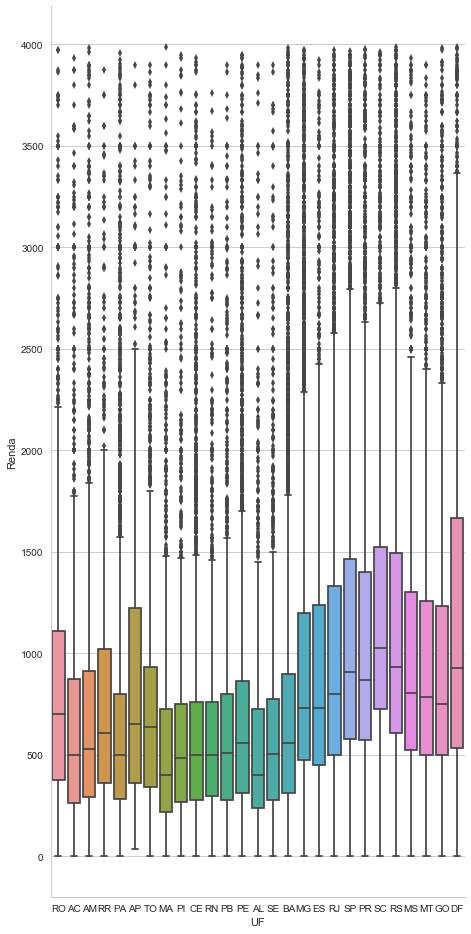

In [29]:
renda = pd.DataFrame({'UF': data.UF,
                      'Renda':data.V4621})

renda = renda[data.V4621<4000]
renda = renda.dropna()
renda = renda[(data.V4622>=0) & (data.V4622<=7)]
renda.UF = renda.UF.astype('category')
renda.UF.cat.categories = (['RO', 'AC', 'AM', 'RR', 'PA', 'AP', 'TO', 'MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE', 'BA', 'MG', 'ES', 'RJ', 'SP', 'PR', 'SC', 'RS', 'MS', 'MT', 'GO', 'DF'])


renda_estado = sns.FacetGrid(renda,size=13,aspect=.5)
renda_estado = sns.boxplot(x='UF', y='Renda', data=renda)




Podemos, então, interpretar o gráfico acima da seguinte maneira: cada um dos retângulos coloridos representa 50% da quantidade de valores de renda per capita domiciliar computada para um estado em específico. A linha que divide o retângulo nos mostra se os dados são simétricos ou não. Mas, o que vem a ser isso? Um conjunto de dados é considerado simétrico quando ele não tende nem a um valor, nem a outro, os dados estão igualmente divididos. O conjunto de valores de renda de um estado somente pode ser considerado simétrico se a linha que o transpassa o dividir exatamente ao meio. Esse é um indicativo de igualdade de renda dentro do próprio estado. Analisando o gráfico, é possível perceber que o Tocantins é o estado com menor desigualdade nesse aspecto, enquanto o Distrito Federal é a região administrativa (visto que não é considerado estado) com maior desigualdade, sendo que este tende a valores mais altos (a maior parte do retângulo fica para o lado de cima da linha), o que significa que pouca gente ganha mais. Também é possível extrair do gráfico a informação de que os estados pertencentes às regiões Sul, Sudeste e Centro-Oeste possuem rendas domicilares per capita maiores do que os estados pertencentes às regiões Norte e Nordeste (os retângulos dos primeiros estão mais elevados em relação aos dos últimos). Por fim, é possível perceber que cada um dos retângulos possui uma linha superior e uma linha inferior, as quais vão até um determinado ponto, até um limite. O ponto até onde a linha de baixo vai indica o valor mínimo computado para a renda domiciliar per capita desse estado, enquanto o ponto até onde a linha de cima vai indica o valor máximo (todas essas informações são obtidas a partir de 50% dos valores computados). Os pontos em preto acima desse limite são os chamados valores aberrantes, ou outliers, isto é, os valores que estão fora do padrão, sejam estes valores de renda domiciliar per capita de uma minoria da população, ou, até mesmo, valores que foram digitados errados na coleta de dados. Depreende-se, portanto, que estes valores atrapalham a minha análise, portanto, posso retirá-los para um estudo mais preciso.




OBS.: Para gerar o gráfico, fiz uma primeira filtragem, deixando somente os valores de renda domiciliar per capita menores do que R$4000.00, haja vista que, caso contrário, os outliers teriam valores tão elevados que seria impossível discernir os retângulos localizados na base do gráfico.

Para confirmar a suspeita de que as regiões Norte e Nordeste possuem valores de renda domiciliar per capita média menores do que as demais regiões, chega a hora de agrupar os estados segundo a configuração já apresentada anteriormente e gerar tabelas e gráficos que comprovem a hipótese em questão.

In [31]:
renda_brasil = renda[(data.V4621<2290)]
renda_norte_nordeste = renda[(data.UF>=11) & (data.UF<=29)]
renda_norte_nordeste = renda_norte_nordeste[(data.V4621<2290)]
renda_sul_sudeste = renda[(data.UF>=31) & (data.UF<=43)]
renda_sul_sudeste = renda_sul_sudeste[(data.V4621<2290)]
renda_centro_oeste = renda[(data.UF>=50) & (data.UF<=53)]
renda_centro_oeste = renda_centro_oeste[(data.V4621<2290)]

C:\Users\taina\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\taina\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\taina\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\taina\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\taina\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\taina\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key

PS.: filtrei os valores da renda per capita domiciliar das regiões, deixando somente aqueles localizados abaixo da marca de R$2290.00, um valor o qual considerei razoável, ao observar o gráfico gerado anteriormente, para contemplar a todas, e, ao mesmo tempo, excluir uma quantidade exorbitante de outliers os quais atrapalhariam a precisão da minha análise.

In [35]:

analise_brasil = renda['Renda'].describe()
mais_frequente_brasil = renda.mode()
analise_norte_nordeste = renda_norte_nordeste['Renda'].describe()
mais_frequente_norte_nordeste = renda_norte_nordeste.mode()
analise_centro_oeste = renda_centro_oeste['Renda'].describe()
mais_frequente_centro_oeste = renda_centro_oeste.mode()
analise_sul_sudeste = renda_sul_sudeste['Renda'].describe()
mais_frequente_sul_sudeste = renda_sul_sudeste.mode()

print(mais_frequente_brasil['Renda'])


0    724.0
Name: Renda, dtype: float64


Somente por curiosidade, eu 'imprimi' na linha superior o valor da moda, isto é, o valor que mais aparece entre as rendas per capita domiciliares no Brasil no ano de 2014. É interessante notar que esta é exatamente igual ao valor do salário mínimo em 2014. Isso demonstra que, no ano em questão, a grande maioria dos domicílios tinha uma renda per capita de mesmo valor que o salário mínimo estipulado no país.

Fonte: http://www.dieese.org.br/notatecnica/2013/notaTec132SalarioMinimo2014.pdf

In [37]:

print(analise_brasil)
print("A média de rendimento per capita por domicílio, olhando o Brasil como um todo, é de: \n")
print("R$ %.2f \n" %(renda_brasil['Renda'].mean()))
print(analise_norte_nordeste)
print("A média de rendimento per capita por domicílio nas regiões Norte e Nordeste é de: \n")
print("R$ %.2f \n" %(renda_norte_nordeste['Renda'].mean()))
print(analise_centro_oeste)
print("A média de rendimento per capita por domicílio na região Centro-Oeste é de: \n")
print("R$ %.2f \n" %(renda_centro_oeste['Renda'].mean()))
print(analise_sul_sudeste)
print("A média de rendimento per capita por domicílio nas regiões Sul e Sudeste é de: \n")
print("R$ %.2f \n" %(renda_sul_sudeste['Renda'].mean()))


count    109444.000000
mean        908.650470
std         729.962095
min           0.000000
25%         400.000000
50%         724.000000
75%        1181.000000
max        3989.000000
Name: Renda, dtype: float64
A média de rendimento per capita por domicílio, olhando o Brasil como um todo, é de: 

R$ 769.57 

count    45451.000000
mean       615.127720
std        451.457721
min          0.000000
25%        283.000000
50%        500.000000
75%        783.000000
max       2289.000000
Name: Renda, dtype: float64
A média de rendimento per capita por domicílio nas regiões Norte e Nordeste é de: 

R$ 615.13 

count    10621.000000
mean       866.927785
std        496.573728
min          0.000000
25%        491.000000
50%        742.000000
75%       1166.000000
max       2284.000000
Name: Renda, dtype: float64
A média de rendimento per capita por domicílio na região Centro-Oeste é de: 

R$ 866.93 

count    46390.000000
mean       898.599784
std        507.160180
min          0.000000
25%    

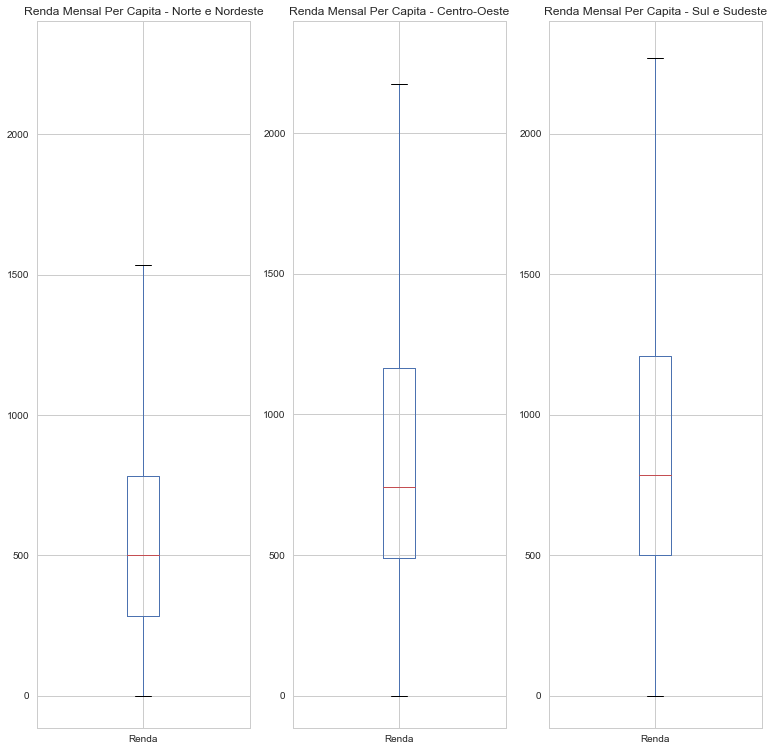

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=3)


renda_norte_nordeste['Renda'].plot(kind='box', figsize=(13,13),ax=axes[0]).set_title('Renda Mensal Per Capita - Norte e Nordeste');

renda_centro_oeste['Renda'].plot(kind='box', figsize=(13,13),ax=axes[1]).set_title('Renda Mensal Per Capita - Centro-Oeste');

renda_sul_sudeste['Renda'].plot(kind='box', figsize=(13,13),ax=axes[2]).set_title('Renda Mensal Per Capita - Sul e Sudeste');


Observando os gráficos gerados, é possível perceber que, na tentativa de deixar todos na mesma escala, acabei incluindo muitos valores aberrantes na computação da média do agrupamento Norte-Nordeste, o que acabou distorcendo esta última. (Basta observar que a linha superior do boxplot do primeiro gráfico vai até um valor um pouco acima de mil e quinhentos reais, enquanto a linha superior dos demais gráficos alcança valores superiores a dois mil reais - desse modo, entram na computação da média do agrupamento Norte-Nordeste todos os valores que vão do limite da linha até o último valor do gráfico, tornando a análise imprecisa)

Dessa forma, filtrarei os valores mais uma vez e computarei a média novamente.

In [41]:
renda_norte_nordeste = renda_norte_nordeste[(data.V4621<1600)]
renda_sul_sudeste = renda_sul_sudeste[(data.V4621<2200)]
renda_centro_oeste = renda_centro_oeste[(data.V4621<2300)]

C:\Users\taina\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\taina\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\taina\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [42]:

print(analise_norte_nordeste)
print("A média de rendimento per capita por domicílio nas regiões Norte e Nordeste é de: \n")
print("R$ %.2f \n" %(renda_norte_nordeste['Renda'].mean()))
print(analise_centro_oeste)
print("A média de rendimento per capita por domicílio na região Centro-Oeste é de: \n")
print("R$ %.2f \n" %(renda_centro_oeste['Renda'].mean()))
print(analise_sul_sudeste)
print("A média de rendimento per capita por domicílio nas regiões Sul e Sudeste é de: \n")
print("R$ %.2f \n" %(renda_sul_sudeste['Renda'].mean()))

count    45451.000000
mean       615.127720
std        451.457721
min          0.000000
25%        283.000000
50%        500.000000
75%        783.000000
max       2289.000000
Name: Renda, dtype: float64
A média de rendimento per capita por domicílio nas regiões Norte e Nordeste é de: 

R$ 550.54 

count    10621.000000
mean       866.927785
std        496.573728
min          0.000000
25%        491.000000
50%        742.000000
75%       1166.000000
max       2284.000000
Name: Renda, dtype: float64
A média de rendimento per capita por domicílio na região Centro-Oeste é de: 

R$ 866.93 

count    46390.000000
mean       898.599784
std        507.160180
min          0.000000
25%        500.000000
50%        787.000000
75%       1208.000000
max       2287.000000
Name: Renda, dtype: float64
A média de rendimento per capita por domicílio nas regiões Sul e Sudeste é de: 

R$ 883.91 



Agora, com os valores atualizados e uma média mais precisa, comprovo que, segundo os critérios utilizados no desenvolvimento deste trabalho, as regiões Norte e Nordeste são as mais carentes do país, apresentando uma renda per capita domiciliar média de, aproximadamente, quinhentos e cinquenta reais, enquanto as regiões Sul e Sudeste apresentam um valor aproximado de oitocentos e oitenta e três reais e a região Centro-Oeste de oitocentos e sessenta e seis reais.

Comprovada tal condição, eu retorno ao meu problema inicial, filtrando os dados de modo a analisar a questão da desinformação somente nessas duas regiões do Brasil (Norte e Nordeste), de forma conjunta.

Ps.: Considerarei como meios de comunicação o rádio, a televisão em cores e a Internet em domicílio.

In [50]:
df = pd.DataFrame({'Baixa_Renda': data.V4622,
                   'Radio': data.V0225,
                   'TV_cores': data.V0226,
                   'Internet': data.V02322,
                   'Info_Cad_Único' : data.V33001,
                   'Prog_Sociais' : data.V33002})

df = df[(data.V4622==0) | (data.V4622==1) | (data.V4622==2)]
df = df[(data.UF>=11) & (data.UF<=29)]

df = df.dropna()
df.Info_Cad_Único = df.Info_Cad_Único.astype('category')
df.Info_Cad_Único.cat.categories = (['Não'])
df.Internet = df.Internet.astype('category')
df.Internet.cat.categories = (['Sim', 'Não'])
df.Prog_Sociais = df.Prog_Sociais.astype('category')
df.Prog_Sociais.cat.categories = (['Sim','Não'])
df.Radio = df.Radio.astype('category')
df.Radio.cat.categories = (['Sim','Não'])
df.TV_cores = df.TV_cores.astype('category')
df.TV_cores.cat.categories = (['Sim','Não'])


C:\Users\taina\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


Neste trabalho, considero como carentes as famílias que vivem com uma renda domiciliar per capita de até meio salário-mínimo, o mesmo critério utilizado pelo IPEA (Fonte: http://www.ipea.gov.br/agencia/images/stories/PDFs/livros/03.renda.pdf)

De modo a responder, de forma definitiva, ao problema proposto no início do trabalho, analisando se a desinformação é, ou não, um fator determinante na perpetuação da pobreza no Brasil, na medida em que priva as pessoas de tomarem ciência acerca dos programas sociais mantidos pelo governo, é plausível analisar, em conjunto e comparação, o conhecimento das pessoas que possuem um rendimento domiciliar per capita superior e, portanto, um maior acesso à informação, acerca desses mesmos programas sociais.

In [51]:
df2 = pd.DataFrame({'Média e Alta Renda': data.V4622,
                   'Radio': data.V0225,
                   'TV_cores': data.V0226,
                   'Internet': data.V02322,
                   'Info_Cad_Único' : data.V33001,
                   'Prog_Sociais' : data.V33002})

df2 = df2[(data.V4622==3) | (data.V4622==4) | (data.V4622==5) | (data.V4622==6) | (data.V4622==7)]
df2 = df2[(data.UF>=11) & (data.UF<=29)]

df2 = df2.dropna()
df2.Info_Cad_Único = df2.Info_Cad_Único.astype('category')
df2.Info_Cad_Único.cat.categories = (['Não'])
df2.Internet = df2.Internet.astype('category')
df2.Internet.cat.categories = (['Sim', 'Não'])
df2.Prog_Sociais = df2.Prog_Sociais.astype('category')
df2.Prog_Sociais.cat.categories = (['Sim','Não'])
df2.Radio = df2.Radio.astype('category')
df2.Radio.cat.categories = (['Sim','Não'])
df2.TV_cores = df2.TV_cores.astype('category')
df2.TV_cores.cat.categories = (['Sim','Não'])

C:\Users\taina\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


Frequências relativas (Conhecimento acerca dos Programas Sociais mantidos pelo governo - por pessoas de baixa renda:)
Sim    90.953586
Não     9.046414
Name: Prog_Sociais, dtype: float64 

Frequências relativas (Conhecimento acerca dos Programas Sociais mantidos pelo governo - por pessoas de renda média-alta:)
Sim    82.788402
Não    17.211598
Name: Prog_Sociais, dtype: float64 



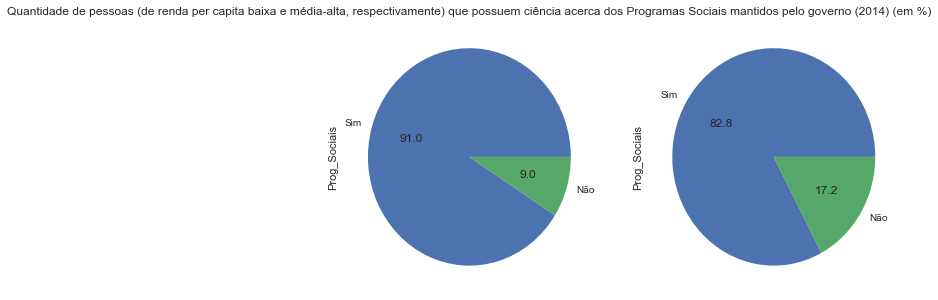

In [52]:
fig, axes = plt.subplots(nrows=1, ncols=2)

abs_relat_prog_sociais = df.Prog_Sociais.value_counts(True)*100
print('Frequências relativas (Conhecimento acerca dos Programas Sociais mantidos pelo governo - por pessoas de baixa renda:)')
print(abs_relat_prog_sociais,'\n')
porcen_1 = abs_relat_prog_sociais.plot.pie(title='Quantidade de pessoas (de renda per capita baixa e média-alta, respectivamente) que possuem ciência acerca dos Programas Sociais mantidos pelo governo (2014) (em %)',autopct='%.1f', figsize=[10,5], ax=axes[0])


abs_relat2_prog_sociais = df2.Prog_Sociais.value_counts(True)*100
print('Frequências relativas (Conhecimento acerca dos Programas Sociais mantidos pelo governo - por pessoas de renda média-alta:)')
print(abs_relat2_prog_sociais,'\n')
porcen_1_1 = abs_relat2_prog_sociais.plot.pie(autopct='%.1f', figsize=[10,5], ax=axes[1])

Frequências relativas (Conhecimento acerca do Cadastro Único de Programas Sociais do Governo Federal - por pessoas de baixa renda:)
Não    100.0
Name: Info_Cad_Único, dtype: float64 

Frequências relativas (Conhecimento acerca dos Programas Sociais mantidos pelo governo - por pessoas de renda média-alta:)
Não    100.0
Name: Info_Cad_Único, dtype: float64 



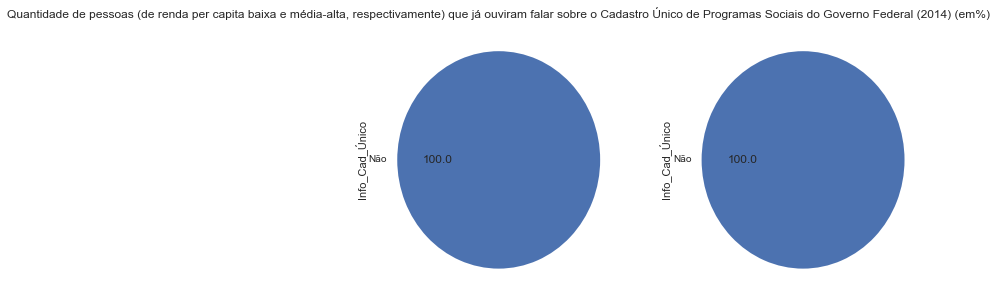

In [54]:
fig, axes = plt.subplots(nrows=1, ncols=2)

abs_relat_cad_unico = df.Info_Cad_Único.value_counts(True)*100
print('Frequências relativas (Conhecimento acerca do Cadastro Único de Programas Sociais do Governo Federal - por pessoas de baixa renda:)')
print(abs_relat_cad_unico,'\n')
porcen_2 = abs_relat_cad_unico.plot.pie(title='Quantidade de pessoas (de renda per capita baixa e média-alta, respectivamente) que já ouviram falar sobre o Cadastro Único de Programas Sociais do Governo Federal (2014) (em%)',autopct='%.1f',figsize=[10,5], ax=axes[0])

abs_relat2_cad_unico = df2.Info_Cad_Único.value_counts(True)*100
print('Frequências relativas (Conhecimento acerca dos Programas Sociais mantidos pelo governo - por pessoas de renda média-alta:)')
print(abs_relat2_cad_unico,'\n')
porcen_2_1 = abs_relat2_cad_unico.plot.pie(autopct='%.1f', figsize=[10,5], ax=axes[1])

É relevante ressaltar um ponto aqui: nenhuma pessoa, dentre as famílias carentes e as famílias de média e alta renda, já ouviu falar acerca do Cadastro Único de Programas Sociais do Governo Federal.

Frequências relativas (Pessoas de baixa renda que possuem acesso à Internet no próprio domicílio:
Não    68.894515
Sim    31.105485
Name: Internet, dtype: float64 

Frequências relativas (Pessoas de renda média e alta que possuem acesso à Internet no próprio domicílio:
Não    52.776064
Sim    47.223936
Name: Internet, dtype: float64 



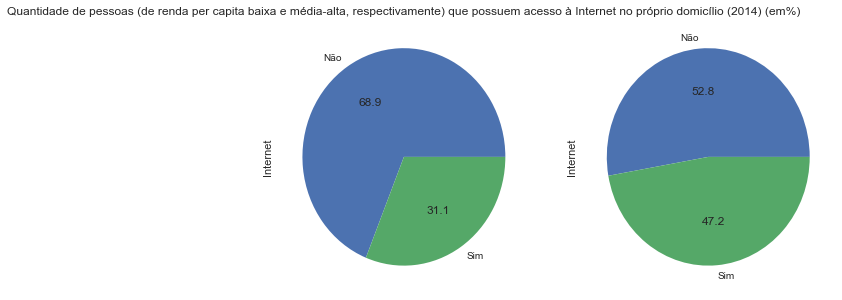

In [55]:
fig, axes = plt.subplots(nrows=1, ncols=2)

abs_relat_internet = df.Internet.value_counts(True)*100
print('Frequências relativas (Pessoas de baixa renda que possuem acesso à Internet no próprio domicílio:')
print(abs_relat_internet,'\n')
porcen_3 = abs_relat_internet.plot.pie(title='Quantidade de pessoas (de renda per capita baixa e média-alta, respectivamente) que possuem acesso à Internet no próprio domicílio (2014) (em%)',autopct='%.1f',figsize=[10,5], ax=axes[0])


abs_relat2_internet = df2.Internet.value_counts(True)*100
print('Frequências relativas (Pessoas de renda média e alta que possuem acesso à Internet no próprio domicílio:')
print(abs_relat2_internet,'\n')
porcen_3_1 = abs_relat2_internet.plot.pie(autopct='%.1f', figsize=[10,5], ax=axes[1])

Frequências relativas (Pessoas de baixa renda que possuem TV em cores:)
Sim    93.873418
Não     6.126582
Name: TV_cores, dtype: float64 

Frequências relativas (Pessoas de renda média e alta que possuem TV em cores:)
Sim    94.949105
Não     5.050895
Name: TV_cores, dtype: float64 



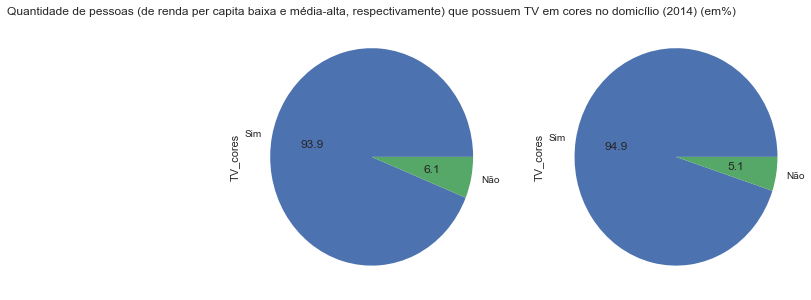

In [56]:
fig, axes = plt.subplots(nrows=1, ncols=2)

abs_relat_TV = df.TV_cores.value_counts(True)*100
print('Frequências relativas (Pessoas de baixa renda que possuem TV em cores:)')
print(abs_relat_TV,'\n')
porcen_4 = abs_relat_TV.plot.pie(title='Quantidade de pessoas (de renda per capita baixa e média-alta, respectivamente) que possuem TV em cores no domicílio (2014) (em%)',autopct='%.1f',figsize=[10,5], ax=axes[0])

abs_relat2_TV = df2.TV_cores.value_counts(True)*100
print('Frequências relativas (Pessoas de renda média e alta que possuem TV em cores:)')
print(abs_relat2_TV,'\n')
porcen_4 = abs_relat2_TV.plot.pie(autopct='%.1f',figsize=[10,5], ax=axes[1])

Frequências relativas (Pessoas de baixa renda que possuem rádio:)
Sim    59.544304
Não    40.455696
Name: Radio, dtype: float64 

Frequências relativas (Pessoas de renda média e alta que possuem rádio:)
Sim    63.348242
Não    36.651758
Name: Radio, dtype: float64 



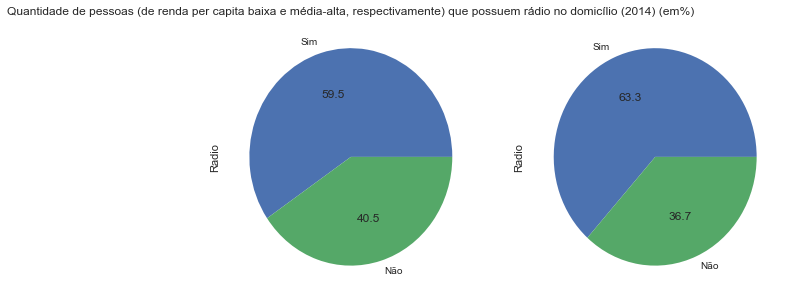

In [57]:
fig, axes = plt.subplots(nrows=1, ncols=2)

abs_relat_radio = df.Radio.value_counts(True)*100
print('Frequências relativas (Pessoas de baixa renda que possuem rádio:)')
print(abs_relat_radio,'\n')
porcen_5 = abs_relat_radio.plot.pie(title='Quantidade de pessoas (de renda per capita baixa e média-alta, respectivamente) que possuem rádio no domicílio (2014) (em%)',autopct='%.1f',figsize=(10,5), ax=axes[0])

abs_relat2_radio = df2.Radio.value_counts(True)*100
print('Frequências relativas (Pessoas de renda média e alta que possuem rádio:)')
print(abs_relat2_radio,'\n')
porcen_5 = abs_relat2_radio.plot.pie(autopct='%.1f', figsize=(10,5), ax=axes[1])

Abaixo, gero o gráfico que responde ao problema proposto inicialmente. Segundo a porcentagem de pessoas que não possuem acesso a nenhum meio de comunicação (rádio, televisão e Internet), que possuem acesso a somente um, dois ou, até mesmo, a todos os meios de comunicação considerados, ele retorna a porcentagem destas que tem ciência ou não dos programas sociais mantidos pelo governo. Dessa forma, faço um comparativo lado a lado entre as famílias de baixa e de média-alta renda.

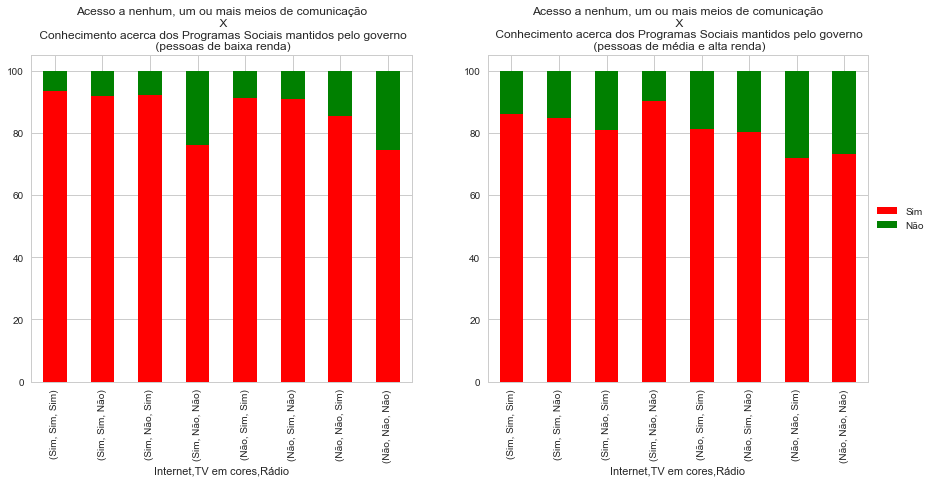

In [60]:
fig, axes = plt.subplots(nrows=1, ncols=2)

baixa_renda = pd.crosstab([df.Internet,df.TV_cores, df.Radio],df.Prog_Sociais,rownames=['Internet', 'TV em cores', 'Rádio'], colnames=['Programas Sociais'], normalize='index')*100

media_alta_renda = pd.crosstab([df2.Internet,df2.TV_cores, df2.Radio],df2.Prog_Sociais,rownames=['Internet', 'TV em cores', 'Rádio'], colnames=['Programas Sociais'], normalize='index')*100

baixa_renda.plot.bar(stacked=True, figsize=[15,6], ax=axes[0], legend=False, color=['red','green'], title='Acesso a nenhum, um ou mais meios de comunicação\n X\n Conhecimento acerca dos Programas Sociais mantidos pelo governo\n (pessoas de baixa renda)')

media_alta_renda.plot.bar(stacked=True, ax=axes[1], legend=True, color=['red','green'], title='Acesso a nenhum, um ou mais meios de comunicação\n X\n Conhecimento acerca dos Programas Sociais mantidos pelo governo\n (pessoas de média e alta renda)')
plt.legend(loc='center left', bbox_to_anchor=(1.0,0.5))

___
## Conclusão 

Descreva aqui suas conclusões!

Em vista de toda a análise realizada, concluo que a desinformação não é um fator determinante na perpetuação da pobreza no Brasil, ao menos não enquanto considera-se que ela contribui com esta apenas na medida em que priva os indivíduos da ciência acerca dos programas sociais mantidos pelo governo, que visam erradicar a pobreza do solo brasileiro. É perceptível que a porcentagem de pessoas que não conhecem os programas sociais em questão, dentre as pessoas de baixa renda que não possuem acesso a nenhum dos meios de comunicação considerados (rádio, televisão em cores ou acesso à Internet em domicílio) é maior em relação às pessoas que possuem acesso a algum dos meios de comunicação, no entanto, a diferença é muito pequena: aproximadamente 75% das pessoas que não possuem acesso a nenhum meio de comunicação têm ciência dos programas sociais. Também é perceptível que o acesso à informação contribui com o conhecimento das pessoas acerca destes últimos, visto que mais de 90% dos indivíduos que têm acesso aos três meios de comunicação também conhecem os programas sociais. Outro resultado que pode se depreender do gráfico é que, dada a porcentagem menor de pessoas que conhecem os programas sociais, tendo acesso à Internet em domicílio, mas não possuindo televisão em cores ou rádio, há que se investir em publicidade em meio virtual com o fim de informar um maior número de pessoas via Internet.
Observando o segundo gráfico, é perceptível que, em geral, as pessoas de média e alta renda possuem menor conhecimento acerca dos programas sociais, mesmo possuindo acesso aos meios de comunicação. E, talvez, isso se justifique pelo fato de que os programas governamentais não têm nelas o seu público-alvo. O segundo gráfico reforça a ideia de que a desinformação não é determinante no que tange ao conhecimento acerca dos programas governamentais para erradicação da pobreza.



PS1.: Não apresentei, em meu projeto, a evolução das variáveis analisadas ao longo do tempo, visto que, como já mencionado na introdução, estas não estavam presentes nas demais PNAD's. 

PS2.: Outras conclusões de segundo planos foram apresentadas ao longo do trabalho.